# 6.13.1 Cálculos de los discos y arandelas de sección constante sujetos a un estado de tensiones axisimétrico

In [1]:
from sympy import init_printing, latex, symbols, diff, Function, dsolve, simplify, Eq, solve, expand #, trigsimp
import sympy as sp

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

Se definen las variables:

In [2]:
r  = symbols('r')
ur = Function('u_r')(r)
#w  = Function('w')(r)

# propiedades del material
E, nu, G = symbols('E nu G')
rho      = symbols('rho')

# la velocidad angular
omega    = symbols('omega')

Las deformaciones se relacionan con los desplazamientos mediante:

In [3]:
er  = diff(ur, r)
et  = ur/r

La ley de Hooke para tensión plana es:

In [4]:
sr = (E/(1 - nu**2))*(er + nu*et)
st = (E/(1 - nu**2))*(et + nu*er)

Recordemos que la ecuación diferencial de equilibrio para el caso polar + axisimétrico (caso 3) es:
$$
 \frac{\operatorname{d}\! \sigma_r}{\operatorname{d}\! r} + \frac{\sigma_r - \sigma_\theta}{r} + b_r = 0
$$

Si la arandela gira con una velocidad angular $\omega$, entonces la fuerza másica corresponde a $b_r = \rho \omega^2 r$.

In [5]:
# se define la fuerza másica
br = rho*omega**2*r

eq = simplify(diff(sr, r) + (sr-st)/r + br) # == 0

imprimir("", eq, " = 0")

<IPython.core.display.Math object>

es decir,

In [6]:
eq = simplify((-r**2*(nu**2 - 1)/E)*eq)

imprimir("", eq, " = 0")

<IPython.core.display.Math object>

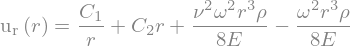

In [7]:
sol = dsolve(eq, ur).expand()

sol

Observe que las constantes quedaron diferentes a como están en el libro, por lo que toca organizarlas:

In [8]:
C1, C2, C3 = sp.symbols('C1, C2, C3')
sol = sol.subs({C1:C3, C2:C1, C3:C2})

In [9]:
ur = sol.rhs

imprimir(r"u_r(r,\theta) = ", ur)

<IPython.core.display.Math object>

In [10]:
ri, re, pi, pe = sp.symbols('r_i, r_e, p_i, p_e')


sol = sp.solve([ Eq(sr.subs(r,ri), -pi),
                 Eq(sr.subs(r,re), -pe) ], [C1, C2])

sol

In [11]:
ur = ur.subs(sol)

In [12]:
er  = expand(diff(ur, r))
et  = expand(ur/r)

In [13]:
imprimir(r"\varepsilon_r(r,\theta) = ", er)

<IPython.core.display.Math object>

In [14]:
imprimir(r"\varepsilon_\theta(r,\theta) = ", et)

<IPython.core.display.Math object>

In [15]:
sr = expand((E/(1 - nu**2))*(er + nu*et))
st = expand((E/(1 - nu**2))*(et + nu*er))

In [16]:
imprimir(r"\sigma_r(r,\theta) = ", sr)

<IPython.core.display.Math object>

In [17]:
imprimir(r"\sigma_\theta(r,\theta) = ", st)

<IPython.core.display.Math object>

In [18]:
sol[C1].factor()

TypeError: list indices must be integers or slices, not Symbol

In [ ]:
sol[C2].factor()